In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from ast import literal_eval
from typing import Optional

data = Path('../data')
plotPath = Path('plots')

## Character traits

In [20]:
dfChar = pd.read_csv(data / "Anime_Triats.csv")

In [21]:
dfChar.head(5)

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
0,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World..."
1,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...
2,2,Edward ELRIC,Blonde Hair,Male,"['Alchemist', 'Arm Blades', 'Artificial Limb',...","['Fullmetal Alchemist', 'Fullmetal Alchemist: ...","['Fullmetal Alchemist', 'Fullmetal Alchemist G..."
3,3,Levi,Black Hair,Male,"['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...","['Attack on Skytree', 'Attack on Titan', 'Atta...","['Attack on Titan', 'Attack on Titan: Junior H..."
4,4,Light YAGAMI,Brown Hair,Male,"['Analytical', 'Big Ego', 'Charismatic', 'God ...","['Death Note', 'Death Note Rewrite 1: Visions ...",['Death Note']


In [22]:
dfChar[dfChar["Gender"] == "Male"]["Gender"].count()

62063

In [23]:
dfChar[dfChar["Gender"] == "Female"]["Gender"].count()

51143

In [24]:
dfGender = dfChar[["Gender","Names"]].groupby("Gender").count().reset_index()

In [25]:
dfGender.head(5)

,Gender,Names
0,110115,1
1,Female,51142
2,Female General and Eldest Princess (Novel),2
3,I Met the Male Lead in Prison (Promo),1
4,Male,62063


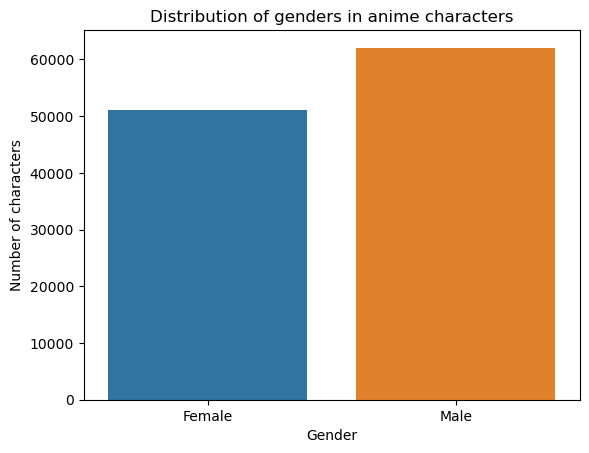

In [26]:
plot = sns.barplot(data = dfGender[dfGender["Names"] > 10], x = "Gender", y= "Names")
plt.title("Distribution of genders in anime characters")
plt.ylabel("Number of characters")
plot.get_figure().savefig(data / plotPath / "Distribution of genders in anime characters.png")

In [27]:
dfChar = dfChar[["Names","Tags"]]
dfChar.dropna(inplace=True)

In [28]:
def safe_literal_eval(node) -> Optional[str]:
     try:
         return literal_eval(node)
     except ValueError:
         return None

In [29]:
dfChar["Tags"] = dfChar["Tags"].apply(safe_literal_eval)
dfChar = dfChar.explode("Tags")

In [30]:
dfChar.head(5)

,Names,Tags
0,L,Analytical
0,L,Barefoot
0,L,Detective
0,L,Eye Bags
0,L,Sweet Tooth


In [31]:
dfChar = dfChar.groupby('Tags').count()
dfChar.reset_index(inplace=True)
dfChar.head(5)

,Tags,Names
0,"""Anata wo Hitokoto de Arawashite Kudasai"" no S...",2
1,"""Aoi"" - Hikaru ga Chikyuu ni Itakoro......",4
2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",2
3,"""Bungaku Shoujo"" Memoire",6
4,"""Bungaku Shoujo"" Movie",4


In [32]:
test = dfChar[dfChar["Names"] > 2000]
test = test.rename(columns={"Names" : "Count"})
test.sort_values(by=['Count'], ascending=False,inplace=True)
test = test[(test["Tags"] != "Ponytail") & (test["Tags"] != "Hat") & (test["Tags"] != "Pointy Ears") & (test["Tags"] != "Hair Ribbons") & (test["Tags"] != "Hair Antenna") & (test["Tags"] != "Headband") & (test["Tags"] != "Pigtails")]
test.head(10)

,Tags,Count
252,Adult,22405
7713,Teenager,19875
3315,High School Student,12919
2854,Glasses,8992
2319,Facial Hair,8807
4758,Magic User,5559
7559,Sword Fighter,3920
1347,Child,3800
658,Athlete,3772
5068,Military,3643


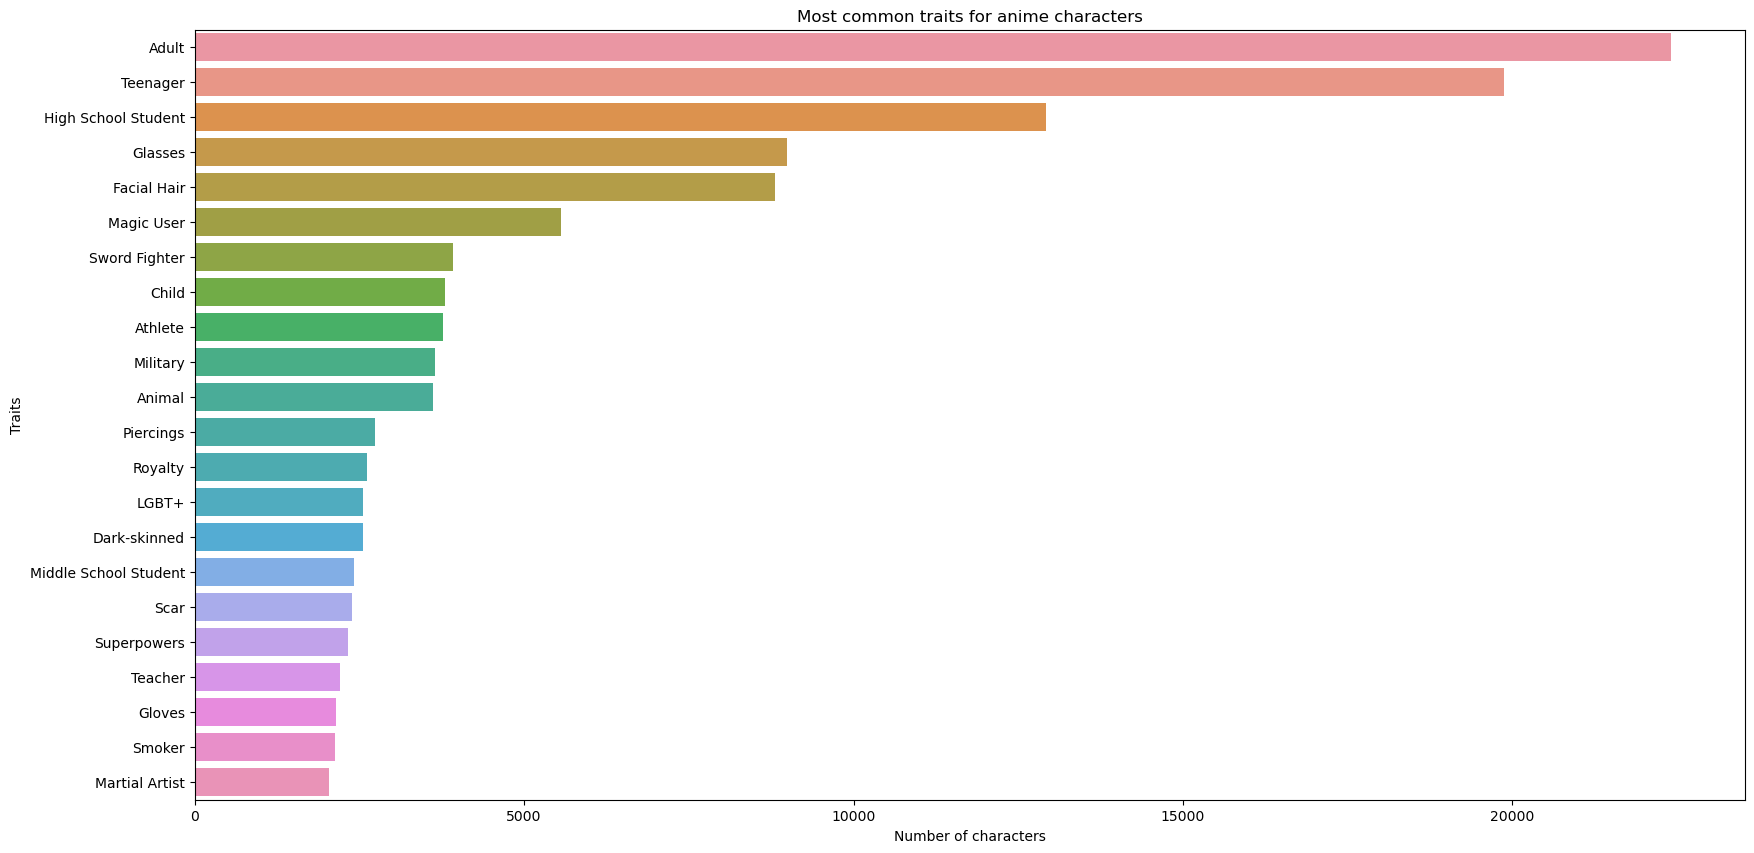

In [33]:
plt.figure(figsize=(20,10))
plot = sns.barplot(data = test, y = "Tags", x = "Count")
plt.title("Most common traits for anime characters")
plt.xlabel("Number of characters")
plt.ylabel("Traits")
plt.show()
plot.get_figure().savefig(data / plotPath / "Most common traits for animes characters.png")